# Data Exploring

In diesem Notebook wird der Datensatz `data/player_match_statistics.feather` aus `src/1-data-aquisition.ipynb` genauer untersucht und basierend auf diesen Ergebnissen weiterhin angepasst und gecleaned.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_feather("../data/player_match_statistics.feather")
df

,Map,Region,Rounds,Winner,Premade,Score,Score First Half,Score Second Half,Score Overtime,Nickname,...,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
0,de_dust2,EU,10,True,False,9,7,2,0,ForceHunterX,...,2,10,0.62,8.00,1.60,16,4,0,1,0
1,de_dust2,EU,10,True,False,9,7,2,0,R_SaitamaTV,...,4,1,0.20,1.25,0.50,5,1,0,0,1
2,de_dust2,EU,10,True,False,9,7,2,0,kubinatorLSD,...,2,4,0.40,5.00,1.00,10,3,0,0,1
3,de_dust2,EU,10,True,False,9,7,2,0,_mhN,...,5,6,0.75,1.60,0.80,8,1,0,0,0
4,de_dust2,EU,10,True,False,9,7,2,0,RUcKeTa,...,3,4,0.40,3.33,1.00,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272214,de_mirage,SA,19,True,False,16,12,4,0,max_-,...,10,7,0.37,1.90,1.00,19,6,0,0,3
272215,de_mirage,SA,19,True,False,16,12,4,0,brnz4n,...,9,13,0.57,2.56,1.21,23,3,0,0,2
272216,de_mirage,SA,19,True,False,16,12,4,0,allen-_-,...,7,6,0.67,1.29,0.47,9,2,0,0,1
272217,de_mirage,SA,19,True,False,16,12,4,0,Timothyo,...,11,6,0.25,2.18,1.26,24,5,0,1,2


## Daten-Features

Der Datensatz besteht aus 23 Features:

- `Map            (category)` Karte auf der gespielt wurde. Counter-Strike besitzt eine Reihe an selbst-entwickelten 3D Umgebungen in welchen die Spieler spielen können. Neben den selbst-entwickelten Maps können Community-Mitglieder eigene entwickeln, teilen und bespielen.
- `Region         (category)` Kontinent / Geographische Region aus welchen ein Spieler stammt. Um Latenzen gering zu halten stehen auf allen Kontinenten eigene Spielserver.
- `Rounds            (int64)` Anzahl an Runden die gespielt wurde (CSGO-Rounds, _nicht_ FACEIT-Rounds)
- `Winner             (bool)`
- `Premade            (bool)`
- `Score             (int64)`
- `Score First Half  (int64)`
- `Score Second Half (int64)`
- `Score Overtime    (int64)`
- `Nickname         (object)`
- `Player ID        (object)`
- `Professional       (bool)`
- `Assists           (int64)`
- `Deaths            (int64)`
- `Headshots         (int64)`
- `Headshot Ratio  (float64)`
- `K/D Ratio       (float64)`
- `K/R Ratio       (float64)`
- `Kills             (int64)`
- `MVPs              (int64)`
- `Ace               (int64)`
- `Quad Kills        (int64)`
- `Triple Kills      (int64)`

In [4]:
df['Map'] = df['Map'].astype('category')
df['Region'] = df['Region'].astype('category')
df.dtypes

Map                  category
Region               category
Rounds                  int64
Winner                   bool
Premade                  bool
Score                   int64
Score First Half        int64
Score Second Half       int64
Score Overtime          int64
Nickname               object
Player ID              object
Professional             bool
Assists                 int64
Deaths                  int64
Headshots               int64
Headshot Ratio        float64
K/D Ratio             float64
K/R Ratio             float64
Kills                   int64
MVPs                    int64
Ace                     int64
Quad Kills              int64
Triple Kills            int64
dtype: object

## Eigenschaften des Datensatzes

In [4]:
df.describe()

,Rounds,Score,Score First Half,Score Second Half,Score Overtime,Assists,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
count,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000,272219.000000
mean,26.721155,13.368883,7.495079,5.463770,0.410034,3.325231,18.784019,9.041143,0.485781,1.080533,0.700930,18.739809,2.681389,0.023011,0.208806,1.026354
std,5.300303,4.405379,2.852332,2.810193,1.473736,2.045774,4.885496,4.303122,0.158668,0.631450,0.227783,6.928421,1.830898,0.152754,0.471270,1.083097
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.600000,-0.760000,-15.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,11.000000,6.000000,3.000000,0.000000,2.000000,16.000000,6.000000,0.380000,0.730000,0.550000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,27.000000,16.000000,7.000000,6.000000,0.000000,3.000000,19.000000,9.000000,0.500000,1.000000,0.690000,18.000000,2.000000,0.000000,0.000000,1.000000
75%,29.000000,16.000000,9.000000,7.000000,0.000000,5.000000,21.000000,12.000000,0.590000,1.290000,0.840000,23.000000,4.000000,0.000000,0.000000,2.000000
max,72.000000,37.000000,15.000000,15.000000,22.000000,19.000000,64.000000,49.000000,2.000000,23.000000,2.160000,90.000000,19.000000,3.000000,6.000000,10.000000


In [5]:
df_standardized = (df-df.mean())/df.std()
df_standardized.corr()["Professional"].sort_values()

/tmp/ipykernel_28147/155972180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_standardized = (df-df.mean())/df.std()


Deaths              -0.095941
Score Overtime       0.004242
Assists              0.012918
Rounds               0.014504
Ace                  0.025706
Headshot Ratio       0.029766
Score Second Half    0.056201
Quad Kills           0.059900
Triple Kills         0.090592
Winner               0.092085
Score First Half     0.092517
Score                0.097172
Headshots            0.124615
Kills                0.128728
MVPs                 0.137510
K/R Ratio            0.147647
K/D Ratio            0.149942
Premade              0.215678
Professional         1.000000
Name: Professional, dtype: float64

Die Korrelation des Datensatzes zeigt keine eindeutige Korrelation zwischen professionellen und normalen Spieler zu irgendeinem Attribut auf. Schaut man sich die Korrelation zwischen dem `Professional` und dem `Kills` Feature an zeigt sich, dass professionelle Spieler scheinbar mehr Kills machen als normale. Ein Blick auf die Korrelation zum `Deaths` Feature zeigt weiterhin, dass professionelle Spieler auch ein bisschen weniger getötet werden als normale. Dies wird vorallem bei der Korrelation zum `K/D Ratio` (Kills / Deaths Verhältnis) sichtbar: dort zeigt sich eine größere Korrelation. Ebenso bei der `K/R Ration`, als Kills pro Runde zeigt sich eine deutlich positive Korrelation.

In [6]:
df['Map'] = df['Map'].astype('category')
df['Region'] = df['Region'].astype('category')
df.dtypes

Map                  category
Region               category
Rounds                  int64
Winner                   bool
Premade                  bool
Score                   int64
Score First Half        int64
Score Second Half       int64
Score Overtime          int64
Nickname               object
Player ID              object
Professional             bool
Assists                 int64
Deaths                  int64
Headshots               int64
Headshot Ratio        float64
K/D Ratio             float64
K/R Ratio             float64
Kills                   int64
MVPs                    int64
Ace                     int64
Quad Kills              int64
Triple Kills            int64
dtype: object

In [7]:
df.isna().sum()

Map                  0
Region               0
Rounds               0
Winner               0
Premade              0
Score                0
Score First Half     0
Score Second Half    0
Score Overtime       0
Nickname             0
Player ID            0
Professional         0
Assists              0
Deaths               0
Headshots            0
Headshot Ratio       0
K/D Ratio            0
K/R Ratio            0
Kills                0
MVPs                 0
Ace                  0
Quad Kills           0
Triple Kills         0
dtype: int64

Min negativ headshot-ratio, k/d etc. -> weil teamkills -> Soll mit einberechnet werden -> KEIN invalid value

## Distribution of Professional

In [8]:
counts = df["Professional"].value_counts()

In [9]:
counts[1] / (counts[0] + counts[1])

0.38227309629379286

## Violin plots

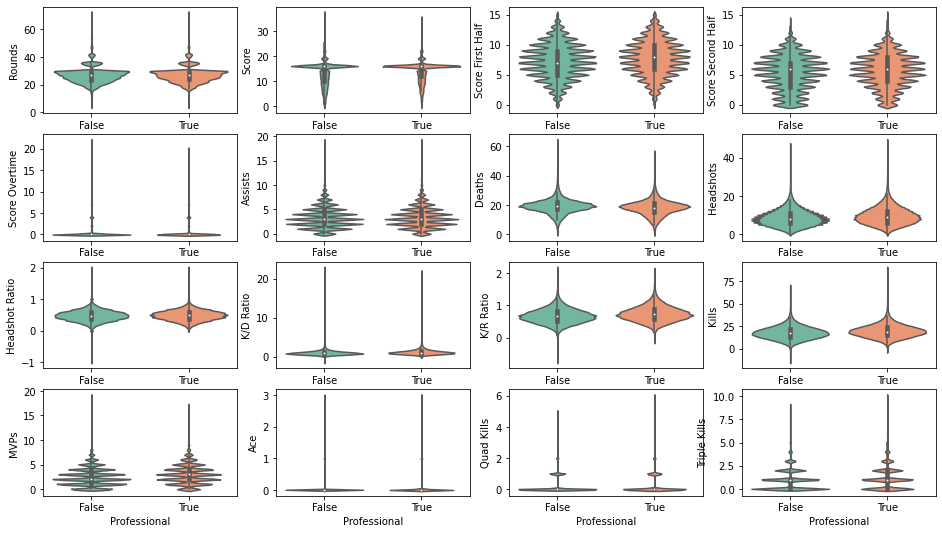

In [10]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(16, 9))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.violinplot(y=column, x="Professional", data=df, palette="Set2", ax=ax)

## Influence of Maps

In [11]:
df["Map"].value_counts()

de_mirage                                 86353
de_inferno                                42295
de_dust2                                  38426
de_nuke                                   27971
de_overpass                               23819
de_ancient                                22692
de_vertigo                                21408
de_train                                   7122
de_cache                                   1256
de_cbble                                    112
workshop/1542127528/de_cbble                110
workshop/2462793279/de_tuscan_FACEIT         99
workshop/322837144/de_season                 80
de_canals                                    50
workshop/251503289/de_dust2_classic          50
cs_italy                                     40
workshop/122443683/aim_map                   38
workshop/1318698056/de_subzero               30
cs_agency                                    30
workshop/1215935299/de_abbey                 20
cs_office                               

<AxesSubplot:xlabel='count', ylabel='Map'>

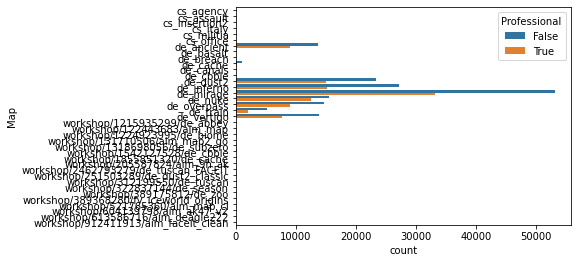

In [12]:
sns.countplot(data=df, y="Map", hue="Professional")

In [13]:
df = df[df["Map"].str.startswith('de')].reset_index(drop=True)

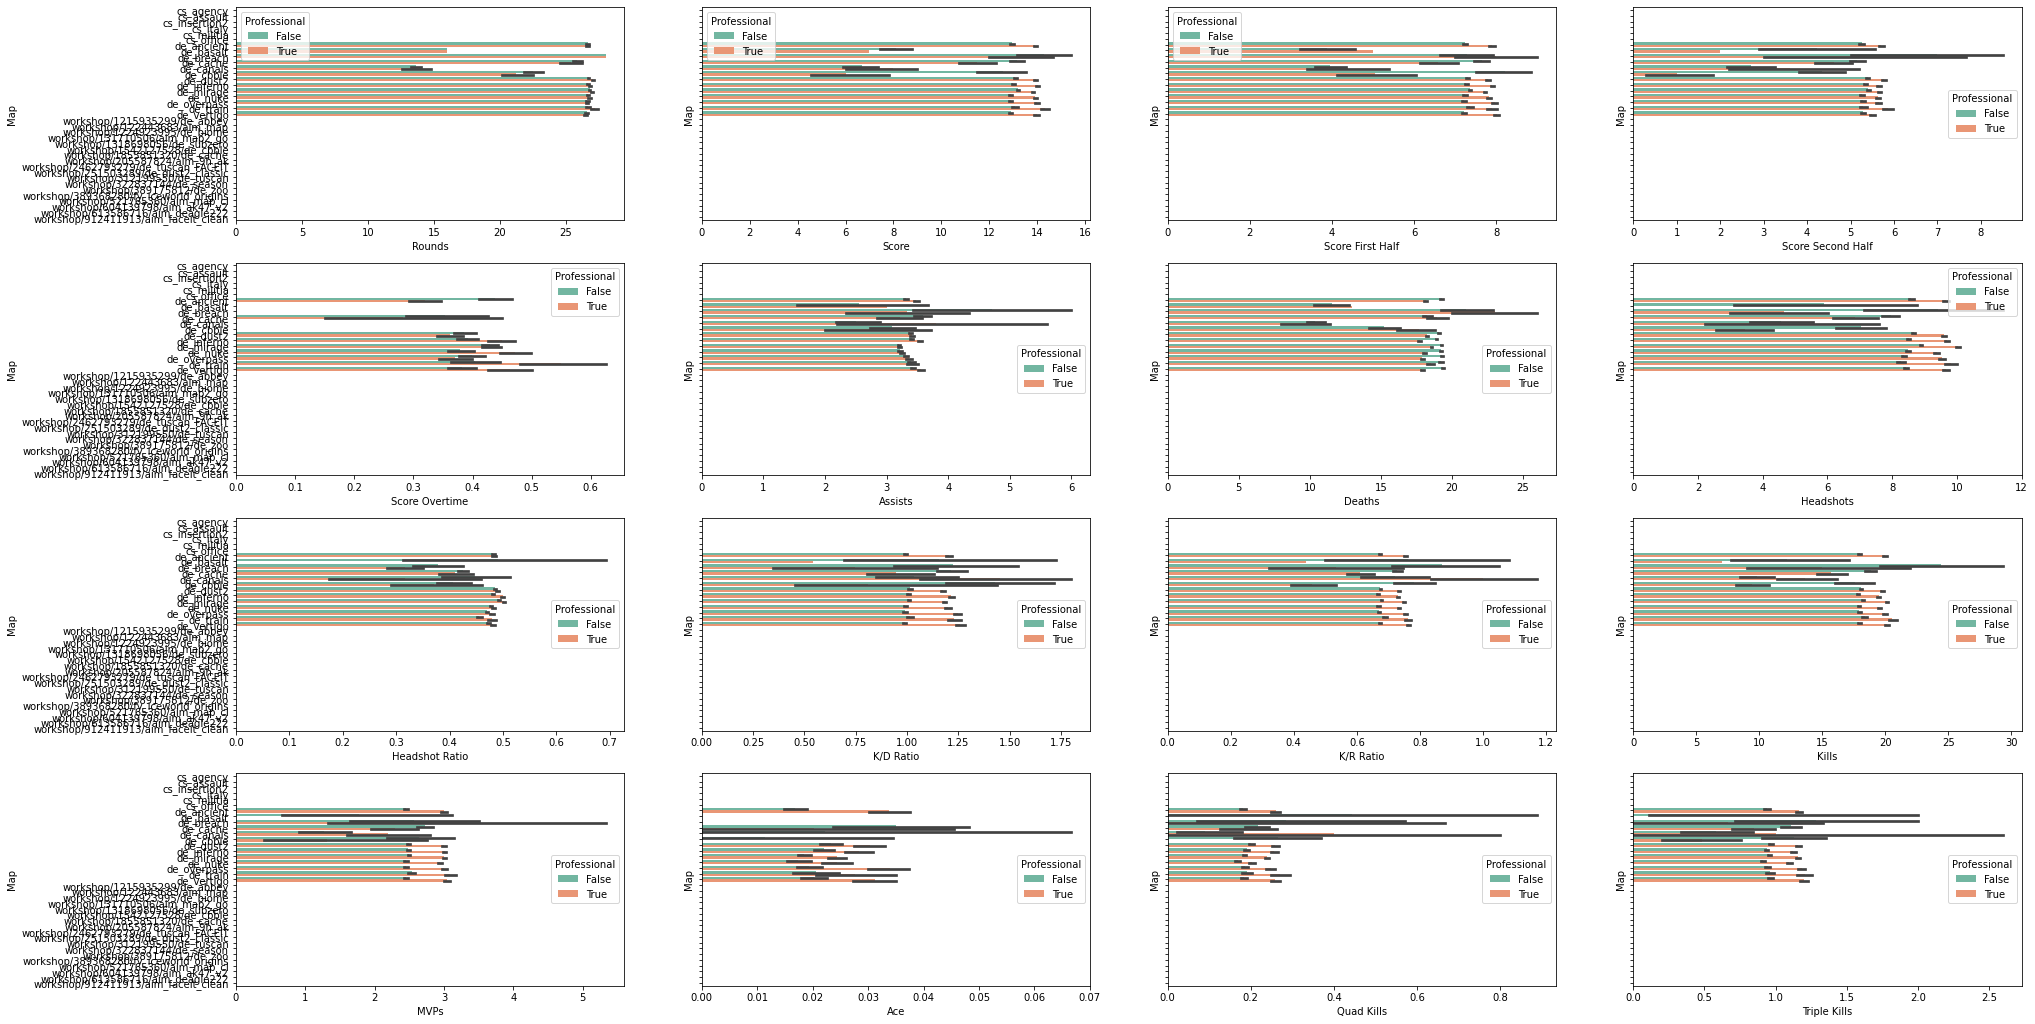

In [14]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(32, 18), sharey=True)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.barplot(x=column, y="Map", hue="Professional", data=df, palette="Set2", ax=ax)

## Influence of Regions

<AxesSubplot:xlabel='count', ylabel='Region'>

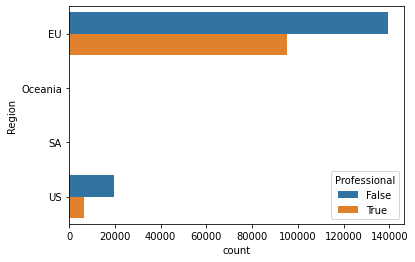

In [19]:
sns.countplot(data=df, y="Region", hue="Professional")

In [20]:
df = df[df.eval("Region in ['EU', 'US']")].reset_index(drop=True)

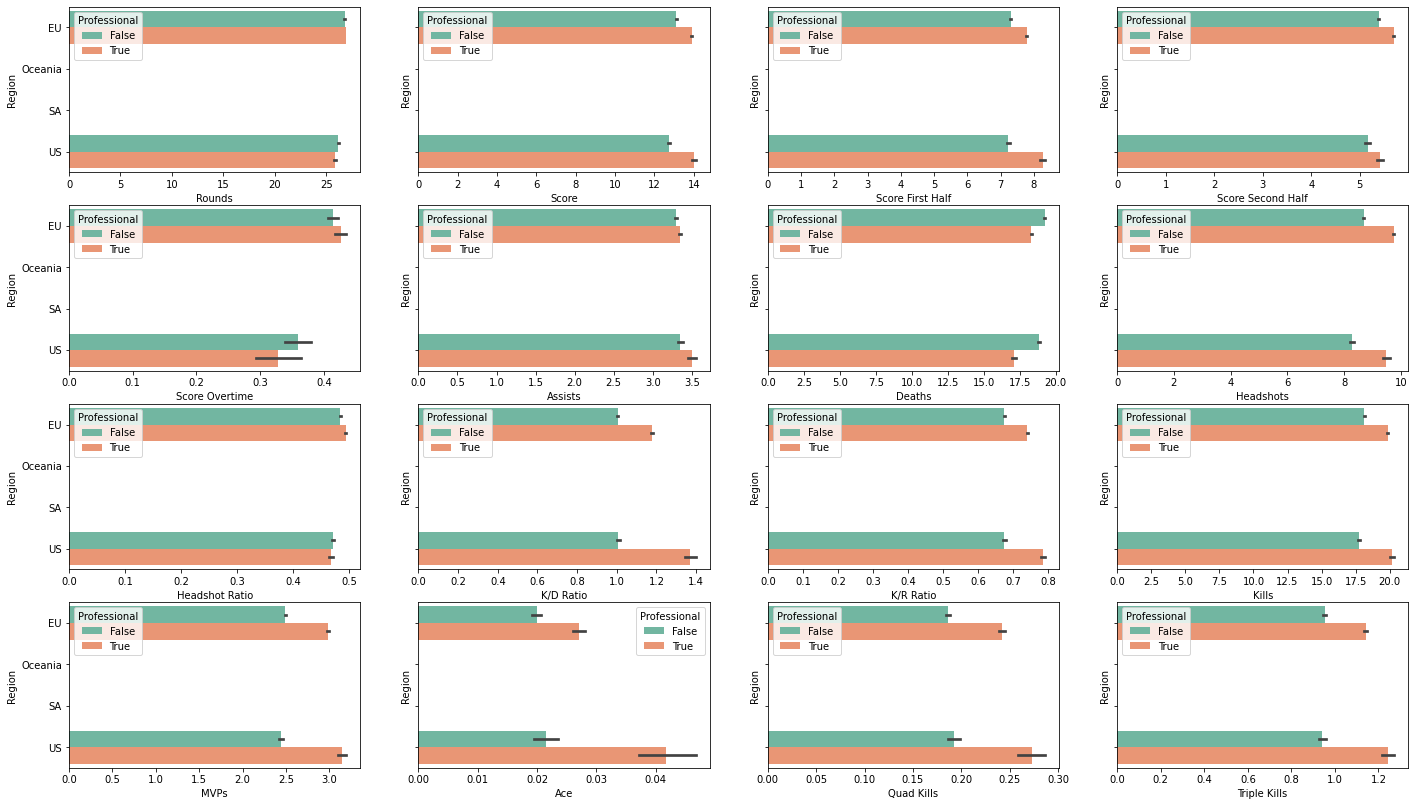

In [21]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharey=True, sharex=False)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.barplot(x=column, y="Region", hue="Professional", data=df, palette="Set2", ax=ax)

## Premade

<AxesSubplot:xlabel='count', ylabel='Premade'>

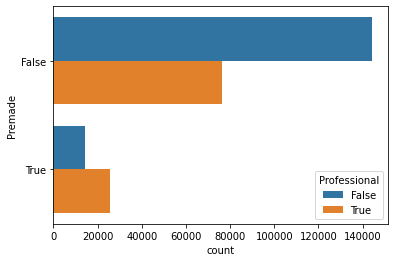

In [22]:
sns.countplot(data=df, y="Premade", hue="Professional")

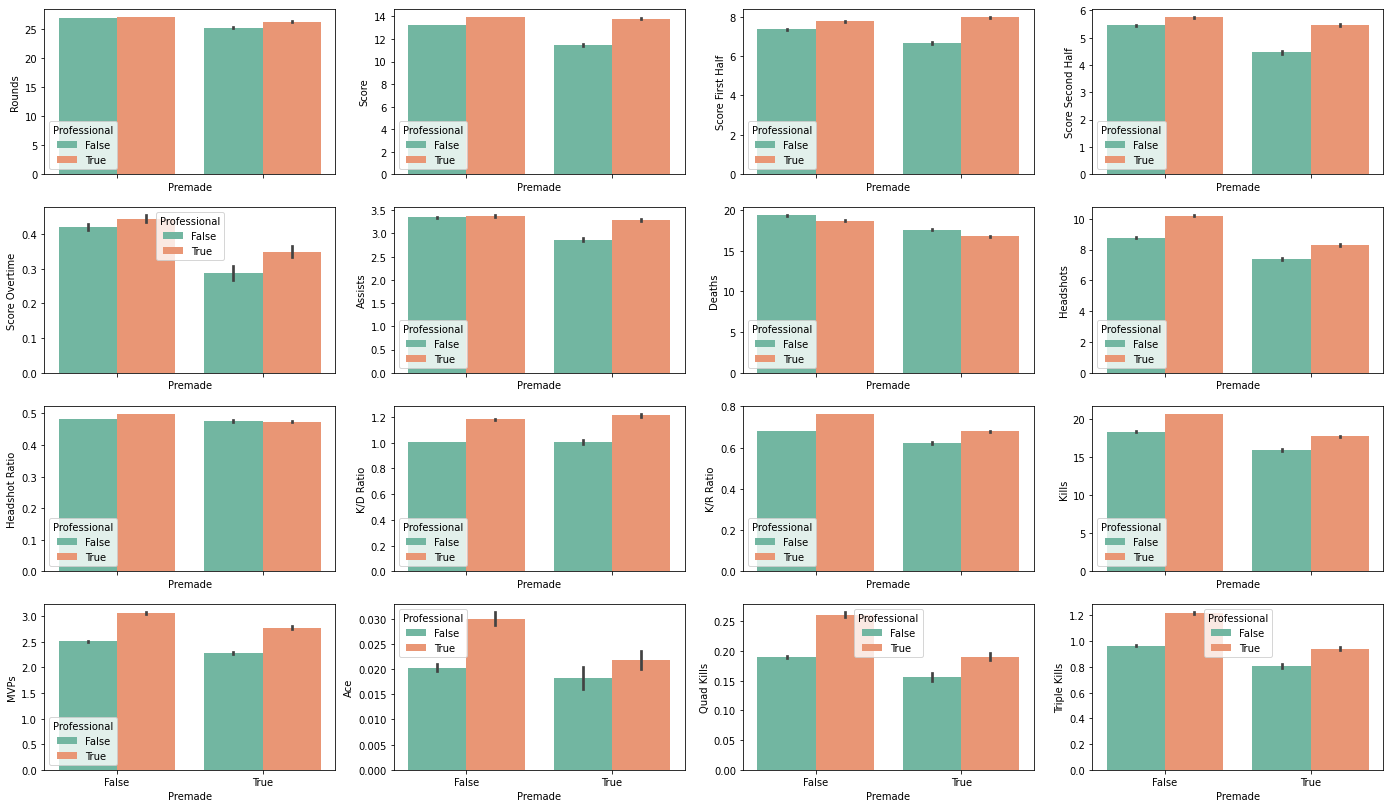

In [23]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(24, 14), sharey=False, sharex=True)
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.barplot(y=column, x="Premade", hue="Professional", data=df, palette="Set2", ax=ax)

## Write cleaned

In [24]:
df["Map"].unique()

['de_dust2', 'de_mirage', 'de_inferno', 'de_cache', 'de_cbble', ..., 'de_train', 'de_overpass', 'de_breach', 'de_canals', 'de_basalt']
Length: 13
Categories (37, object): ['cs_agency', 'cs_assault', 'cs_insertion2', 'cs_italy', ..., 'workshop/521765360/aim_map_cl', 'workshop/604139798/aim_ak47_v2', 'workshop/613586716/aim_deagle222', 'workshop/912411913/aim_faceit_clean']

In [25]:
df.to_feather("../data/player_match_statistics_cleaned.feather")